In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import defaultdict
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (6,6)
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams["image.origin"] = 'lower'

In [2]:
samples_dir = "/eos/home-d/dmapelli/public/latino/Full2017v6"
cut = "lowen_looseVBS"

In [3]:
classes = { "VBS": 0, "Wjets":1, "top": 2, "DY": 3}
signal = "VBS"
sample_names = ["Wjets", "VBS", "DY", "top"]

samples = {}

for file in os.listdir(os.path.join(samples_dir, cut, "samples")):
    if os.path.isdir(os.path.join(samples_dir, cut, "samples", file)): continue
        
    sname = file.split("_part")[0]
    s = pickle.load(open(os.path.join(samples_dir, cut, "samples", file), "rb"))
    s.rename(columns=lambda c: c.split(cut+"_")[1] if cut in c else c, inplace=True)
    s["sample_name"]= sname
    s["class"] = classes[sname]
    if sname == signal:
        s["signal"] = 1
    else: 
        s["signal"] = 0
    if sname in samples:
        samples[sname] = pd.concat([samples[sname], s], ignore_index=True)
    else:
        samples[sname] = s

In [9]:
for s, df in samples.items():
    print(f"Sample name {s:10}, nsamples: {len(df):10},   XS total: {(df.XSWeight*df.weight*df.puWeight).sum()*41 :15}")

Sample name DY        , nsamples:      84602,   XS total: 11054.585129103623
Sample name VBS       , nsamples:     123434,   XS total: 542.9917437296729
Sample name Wjets     , nsamples:     605804,   XS total: 167509.18965719108
Sample name top       , nsamples:      52217,   XS total: 14196.356755176434


In [5]:
from sklearn.utils.class_weight import compute_sample_weight, compute_class_weight
from sklearn.preprocessing import LabelEncoder 

## Balancing

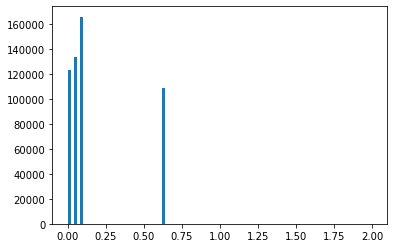

In [5]:
_ = plt.hist(samples["Wjets"].XSWeight*130, bins=100, range=(0,2))


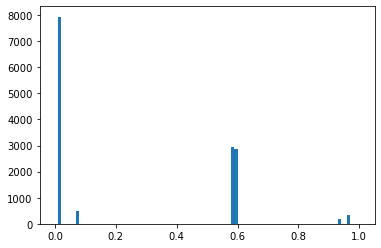

In [10]:
_ = plt.hist(samples["top"].XSWeight*130, bins=100, range=(0,1))
#plt.xscale("log")

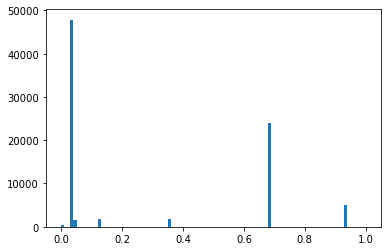

In [11]:
_ = plt.hist(samples["DY"].XSWeight*130, bins=100, range=(0,1))

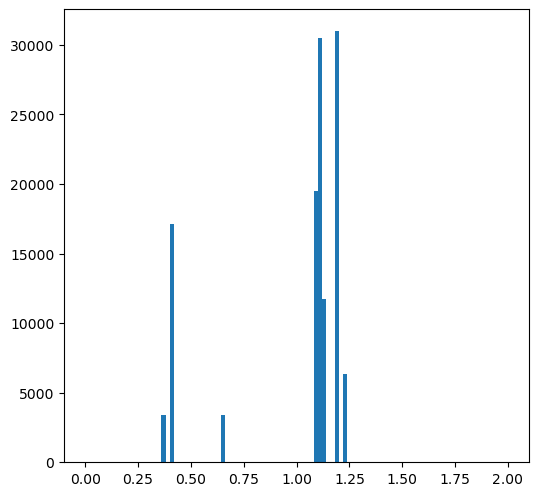

In [56]:
_ = plt.hist(samples["VBS"].XSWeight*(1/samples["VBS"].XSWeight.mean()), bins=100, range=(0,2))

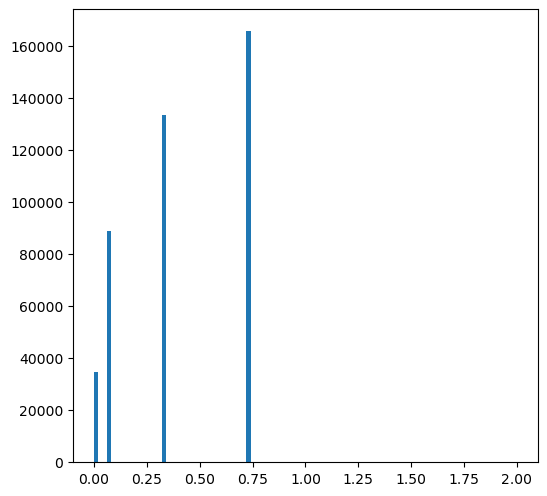

In [93]:
_= plt.hist( samples["Wjets"].XSWeight*1000, bins=100, range=(0, 2))

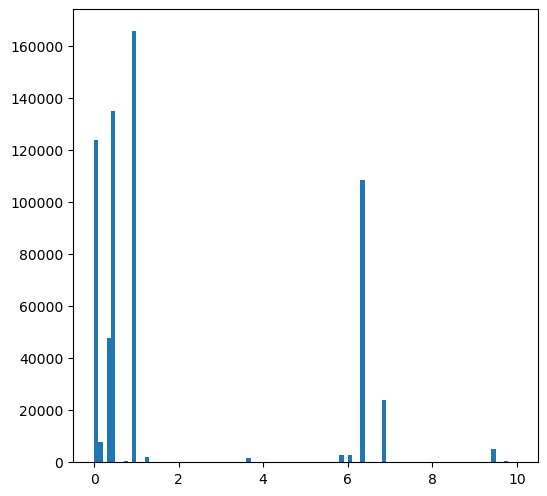

In [84]:
_= plt.hist( (background.XSWeight *(1/ background.XSWeight.mean()))*10  , bins=100, range=(0, 10))

In [14]:
background = pd.concat([
                samples["top"],
                samples["DY"],
                samples["Wjets"]
                ], ignore_index=True)

In [16]:
signal = samples["VBS"]

In [17]:
ratio_neve_bkgsignal= len(background) / len(signal)
print(ratio_neve_bkgsignal)

6.016356919487337


In [19]:
tot_ev_weighted_sig = (signal.XSWeight / signal.XSWeight.mean()).sum()
print("TOT signal weighted events", tot_ev_weighted_sig)

TOT signal weighted events 123433.98


In [22]:
rescale_factor_bkg = (tot_ev_weighted_sig *ratio_neve_bkgsignal )/ background.XSWeight.sum()
print(rescale_factor_bkg)

130.92251298707595


In [23]:
signal["XSWeight_norm"] = signal.XSWeight / signal.XSWeight.mean()
background["XSWeight_norm"] = background.XSWeight * rescale_factor_bkg

## Save signal and bkg samples

In [24]:
pickle.dump(background, open(f"{samples_dir}/{cut}/samples/for_training/background_balanced.pkl", "wb"))

In [25]:
pickle.dump(signal, open(f"{samples_dir}/{cut}/samples/for_training/signal_balanced.pkl", "wb"))

The total number of events will be manually balanced